Consider the minimum variance portfolio with a target return m.

$$
\begin{aligned}
\min_{\mathbf{w}} \quad & \frac{1}{2} \mathbf{w}^\top \Sigma \mathbf{w} \\
\text{s.t.} \quad & \mathbf{w}^\top \mathbf{1} = 1 \quad \text{(budget constraint)} \\
& \mathbf{w}^\top \boldsymbol{\mu} = m \quad \text{(target portfolio return)}
\end{aligned}
$$

a) Formulate the Lagrangian and give partial derivatives

The Lagrangian function is formed using two Lagrange multipliers:

- $\lambda_1$ for the budget constraint
- $\lambda_2$ for the target return constraint

$$
\mathcal{L}(\mathbf{w}, \lambda_1, \lambda_2) =
\frac{1}{2} \mathbf{w}^\top \Sigma \mathbf{w}
- \lambda_1 (\mathbf{w}^\top \mathbf{1} - 1)
- \lambda_2 (\mathbf{w}^\top \boldsymbol{\mu} - m)
$$

And the partial derivatives of the Lagrangian are:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = \Sigma \mathbf{w} - \lambda_1 \mathbf{1} - \lambda_2 \boldsymbol{\mu}
$$

$$
\frac{\partial \mathcal{L}}{\partial \lambda_1} = 1 - \mathbf{w}^\top \mathbf{1}
$$

$$
\frac{\partial \mathcal{L}}{\partial \lambda_2} = m - \mathbf{w}^\top \boldsymbol{\mu}
$$
b) Write down the analytical solution for **$\mathbf{w}^\star$** optimal allocations — no derivation required

Let:

- $A = \mathbf{1}^\top \Sigma^{-1} \mathbf{1}$
- $B = \mathbf{1}^\top \Sigma^{-1} \boldsymbol{\mu}$
- $C = \boldsymbol{\mu}^\top \Sigma^{-1} \boldsymbol{\mu}$
- $\Delta = AC - B^2$

Then the optimal allocation is:

$$
\mathbf{w}^\star = \Sigma^{-1} \left( \frac{C - mB}{\Delta} \mathbf{1} + \frac{mA - B}{\Delta} \boldsymbol{\mu} \right)
$$

c) Compute sensitivities of VaR and ES with respect to each asset

Given:

- Expected returns:
  $\boldsymbol{\mu} = \begin{bmatrix} 0.00 \\ 0.00 \\ 0.00 \end{bmatrix}$

- Standard deviations:
  $\boldsymbol{\sigma} = \begin{bmatrix} 0.30 \\ 0.20 \\ 0.15 \end{bmatrix}$

- Portfolio weights:
  $\boldsymbol{w} = \begin{bmatrix} 0.50 \\ 0.20 \\ 0.30 \end{bmatrix}$

- Correlation matrix $\mathbf{R}$:
  $\begin{bmatrix}
  1.0 & 0.8 & 0.5 \\
  0.8 & 1.0 & 0.3 \\
  0.5 & 0.3 & 1.0
  \end{bmatrix}$

---

The covariance matrix is computed as:
$\Sigma_{ij} = \rho_{ij} \cdot \sigma_i \cdot \sigma_j$

We define:

- Portfolio volatility:
  $\sigma_\Pi = \sqrt{ \boldsymbol{w}^\top \Sigma \boldsymbol{w} }$

- Quantile of the standard normal:
  $z = \Phi^{-1}(1 - c)$

- Standard normal PDF evaluated at $z$:
  $\phi(z)$

We then compute:

- Sensitivity of VaR with respect to $w_i$:
  $\frac{\partial \text{VaR}}{\partial w_i} = \mu_i + z \cdot \frac{ (\Sigma \boldsymbol{w})_i }{ \sigma_\Pi }$

- Sensitivity of ES with respect to $w_i$:
  $\frac{\partial \text{ES}}{\partial w_i} = \mu_i - \frac{ \phi(z) }{ 1 - c } \cdot \frac{ (\Sigma \boldsymbol{w})_i }{ \sigma_\Pi }$

These represent the **change in portfolio VaR or ES** for a small increase in the weight of asset $i$, holding all else constant.


In [6]:
import numpy as np

# Target return
m = 0.045

# Expected returns vector
mu = np.array([0.02, 0.07, 0.15, 0.20])

# Standard deviations
sigma = np.array([0.05, 0.12, 0.17, 0.25])

# Correlation matrix
R = np.array([
    [1.0, 0.3, 0.3, 0.3],
    [0.3, 1.0, 0.6, 0.6],
    [0.3, 0.6, 1.0, 0.6],
    [0.3, 0.6, 0.6, 1.0]
])

# Covariance matrix: Sigma = diag(sigma) * R * diag(sigma)
Sigma = np.outer(sigma, sigma) * R

# Precompute inverse of covariance matrix
Sigma_inv = np.linalg.inv(Sigma)

# Convenience vectors
ones = np.ones_like(mu)

# Compute scalar quantities A, B, C, Delta
A = ones.T @ Sigma_inv @ ones
B = ones.T @ Sigma_inv @ mu
C = mu.T @ Sigma_inv @ mu
Delta = A * C - B**2

# Lagrange multipliers
lambda_1 = (C - m * B) / Delta
lambda_2 = (m * A - B) / Delta

# Optimal portfolio weights
w_star = Sigma_inv @ (lambda_1 * ones + lambda_2 * mu)

# Portfolio risk
portfolio_variance = w_star.T @ Sigma @ w_star
portfolio_std = np.sqrt(portfolio_variance)

# Print results
print("Optimal weights w* =", np.round(w_star, 4))
print("Portfolio expected return =", round(w_star @ mu, 4))
print("Portfolio standard deviation (σΠ) =", round(portfolio_std, 4))


Optimal weights w* = [0.7851 0.0539 0.1336 0.0275]
Portfolio expected return = 0.045
Portfolio standard deviation (σΠ) = 0.0584



## Task 2: Random Portfolio Simulation

In this task, we generate a large number of random portfolio weights and analyze their return and risk characteristics.

### Objective

- Generate 700 random weight vectors $ \mathbf{w} \in \mathbb{R}^4 $, where each satisfies $ \mathbf{w}^\top \mathbf{1} = 1 $
- Allow weights to be negative
- For each portfolio:
  - Compute expected return: $ \mu_\Pi = \mathbf{w}^\top \boldsymbol{\mu} $
  - Compute portfolio risk (standard deviation): $ \sigma_\Pi = \sqrt{\mathbf{w}^\top \Sigma \mathbf{w}} $
- Plot all portfolios on a risk-return diagram (risk on x-axis, return on y-axis)
- Identify the shape and explain the plot



In [7]:
import matplotlib.pyplot as plt

# Number of portfolios
n_portfolios = 700

# Storage for results
portfolio_returns = []
portfolio_risks = []

# Random portfolio generator
np.random.seed(42)  # reproducibility

for _ in range(n_portfolios):
    # Generate 3 random weights from normal distribution
    w_partial = np.random.randn(3)

    # Solve for w4 so that sum(w) = 1
    w4 = 1 - np.sum(w_partial)
    w = np.append(w_partial, w4)

    # Compute portfolio return and risk
    mu_pi = w @ mu
    sigma_pi = np.sqrt(w.T @ Sigma @ w)

    portfolio_returns.append(mu_pi)
    portfolio_risks.append(sigma_pi)


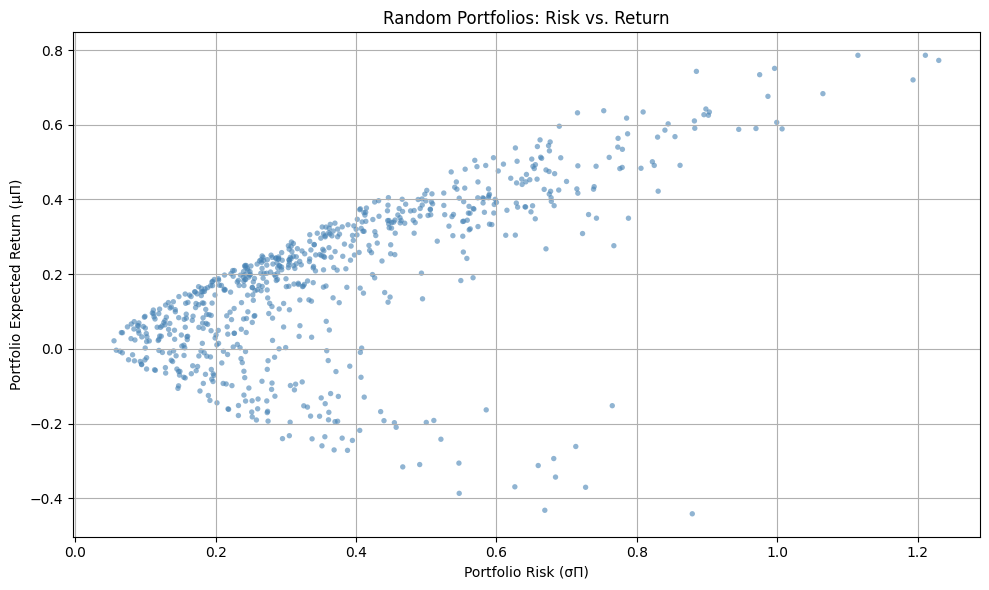

In [8]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_risks, portfolio_returns, c='steelblue', alpha=0.6, s=15, edgecolors='none')
plt.xlabel('Portfolio Risk (σΠ)')
plt.ylabel('Portfolio Expected Return (μΠ)')
plt.title('Random Portfolios: Risk vs. Return')
plt.grid(True)
plt.tight_layout()
plt.show()


### Interpretation

The plotted points represent randomly generated portfolios that satisfy the constraint
$\mathbf{w}^\top \mathbf{1} = 1$.

We observe:

- The points form a **convex, upward-bending cloud**
- The **upper edge** of this shape represents the **efficient frontier** — the best return achievable for each level of risk
- Portfolios below the frontier are **inefficient** (lower return for the same risk)

This experiment visually confirms the theory that the minimum variance portfolio and all optimal portfolios lie on the **upper boundary** of this cloud.



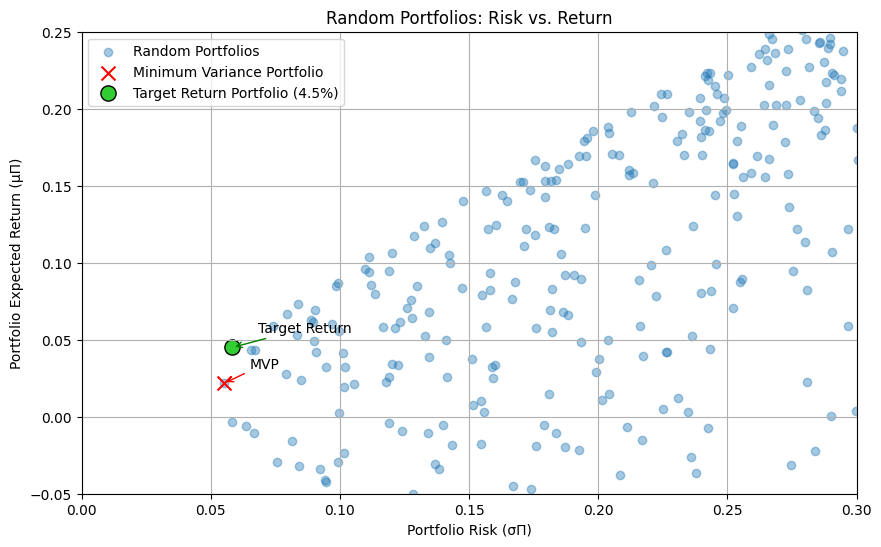

In [14]:
# Compute minimum variance portfolio in the random sample
min_var_idx = np.argmin(portfolio_risks)
min_var_point = (portfolio_risks[min_var_idx], portfolio_returns[min_var_idx])

# Compute target return portfolio risk and return (from Task 1c)
target_return = np.dot(w_star, mu)
target_risk = np.sqrt(np.dot(w_star.T, np.dot(Sigma, w_star)))

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_risks, portfolio_returns, alpha=0.4, label='Random Portfolios')
plt.xlabel("Portfolio Risk (σΠ)")
plt.ylabel("Portfolio Expected Return (μΠ)")
plt.title("Random Portfolios: Risk vs. Return")

# Highlight minimum variance portfolio
plt.scatter(*min_var_point, color='red', marker='x', s=100, label='Minimum Variance Portfolio')

# Highlight target return portfolio
plt.scatter(target_risk, target_return, color='limegreen', edgecolor='black',
            marker='o', s=120, label='Target Return Portfolio (4.5%)')

plt.legend()
plt.grid(True)
# Zoom into the region where the MVP and Target Return Portfolio are
plt.xlim(0, 0.3)   # Adjust based on observed min/max risk
plt.ylim(-0.05, 0.25)  # Adjust based on observed returns
plt.annotate('MVP',
             xy=min_var_point,
             xytext=(min_var_point[0]+0.01, min_var_point[1]+0.01),
             arrowprops=dict(arrowstyle="->", color='red'))

plt.annotate('Target Return',
             xy=(target_risk, target_return),
             xytext=(target_risk+0.01, target_return+0.01),
             arrowprops=dict(arrowstyle="->", color='green'))

plt.show()


c) Compute sensitivities of VaR and ES with respect to each asset

Given:

- Expected returns:
  $\boldsymbol{\mu} = \begin{bmatrix} 0.00 \\ 0.00 \\ 0.00 \end{bmatrix}$

- Standard deviations:
  $\boldsymbol{\sigma} = \begin{bmatrix} 0.30 \\ 0.20 \\ 0.15 \end{bmatrix}$

- Portfolio weights:
  $\boldsymbol{w} = \begin{bmatrix} 0.50 \\ 0.20 \\ 0.30 \end{bmatrix}$

- Correlation matrix $\mathbf{R}$:
  $\begin{bmatrix}
  1.0 & 0.8 & 0.5 \\
  0.8 & 1.0 & 0.3 \\
  0.5 & 0.3 & 1.0
  \end{bmatrix}$

---

The covariance matrix is computed as:
$\Sigma_{ij} = \rho_{ij} \cdot \sigma_i \cdot \sigma_j$

We define:

- Portfolio volatility:
  $\sigma_\Pi = \sqrt{ \boldsymbol{w}^\top \Sigma \boldsymbol{w} }$

- Quantile of the standard normal:
  $z = \Phi^{-1}(1 - c)$

- Standard normal PDF evaluated at $z$:
  $\phi(z)$

We then compute:

- Sensitivity of VaR with respect to $w_i$:
  $\frac{\partial \text{VaR}}{\partial w_i} = \mu_i + z \cdot \frac{ (\Sigma \boldsymbol{w})_i }{ \sigma_\Pi }$

- Sensitivity of ES with respect to $w_i$:
  $\frac{\partial \text{ES}}{\partial w_i} = \mu_i - \frac{ \phi(z) }{ 1 - c } \cdot \frac{ (\Sigma \boldsymbol{w})_i }{ \sigma_\Pi }$

These represent the **change in portfolio VaR or ES** for a small increase in the weight of asset $i$, holding all else constant.


In [17]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# === Input data ===

# Expected returns
mu = np.array([0.00, 0.00, 0.00])

# Standard deviations
sigma = np.array([0.30, 0.20, 0.15])

# Portfolio weights
weights = np.array([0.50, 0.20, 0.30])

# Correlation matrix
corr = np.array([
    [1.0, 0.8, 0.5],
    [0.8, 1.0, 0.3],
    [0.5, 0.3, 1.0]
])

# === Step 1: Covariance matrix ===
D = np.diag(sigma)
Sigma = D @ corr @ D

# === Step 2: Portfolio volatility ===
sigma_pi = np.sqrt(weights.T @ Sigma @ weights)

# === Step 3: z and phi(z) ===
c = 0.99
z = norm.ppf(1 - c)          # ≈ -2.326
phi_z = norm.pdf(z)          # ≈ 0.026

# === Step 4: Compute sensitivities ===
Sigma_w = Sigma @ weights

dVaR_dw = mu + z * (Sigma_w / sigma_pi)
dES_dw = mu - (phi_z / (1 - c)) * (Sigma_w / sigma_pi)

# === Step 5: Summary table ===
df = pd.DataFrame({
    "Asset": ["Asset 1", "Asset 2", "Asset 3"],
    "Weight": weights,
    "Sigma": sigma,
    "VaR sensitivity": dVaR_dw,
    "ES sensitivity": dES_dw
})

print(df)


     Asset  Weight  Sigma  VaR sensitivity  ES sensitivity
0  Asset 1     0.5   0.30        -0.683865       -0.783480
1  Asset 2     0.2   0.20        -0.386799       -0.443142
2  Asset 3     0.3   0.15        -0.220709       -0.252859


In [18]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Define confidence levels as decimals
confidence_levels = np.array([99.95, 99.75, 99.5, 99.25, 99, 98.5, 98, 97.5]) / 100

# Compute z = Φ⁻¹(1 - c)
z_values = norm.ppf(1 - confidence_levels)

# Compute ϕ(z)
phi_values = norm.pdf(z_values)

# Compute standardized Expected Shortfall: ES_c = -ϕ(z) / (1 - c)
ES_values = -phi_values / (1 - confidence_levels)

# Create DataFrame
es_table = pd.DataFrame({
    "Confidence Level (%)": confidence_levels * 100,
    "z = Φ⁻¹(1 - c)": z_values,
    "ϕ(z)": phi_values,
    "Standardized ES": ES_values
})

# Display result
print(es_table)


   Confidence Level (%)  z = Φ⁻¹(1 - c)      ϕ(z)  Standardized ES
0                 99.95       -3.290527  0.001777        -3.554381
1                 99.75       -2.807034  0.007761        -3.104357
2                 99.50       -2.575829  0.014460        -2.891949
3                 99.25       -2.432379  0.020709        -2.761240
4                 99.00       -2.326348  0.026652        -2.665214
5                 98.50       -2.170090  0.037870        -2.524695
6                 98.00       -2.053749  0.048418        -2.420907
7                 97.50       -1.959964  0.058445        -2.337803


### Derivation of the EWMA Variance Model

We aim to derive the Exponentially Weighted Moving Average (EWMA) model for volatility, which takes the recursive form:

$$
\sigma_t^2 = \lambda \sigma_{t-1}^2 + (1 - \lambda) u_{t-1}^2
$$

where:

- $\sigma_t^2$ is the conditional variance at time $t$
- $u_t$ is the return innovation (e.g., return minus mean)
- $0 < \lambda < 1$ is the decay factor, controlling how quickly past information decays

---

### Step 1: Weighted Moving Average of Past Squared Returns

Assume the conditional variance is computed as an **infinite weighted average** of past squared returns:

$$
\sigma_t^2 = \alpha_1 u_{t-1}^2 + \alpha_2 u_{t-2}^2 + \alpha_3 u_{t-3}^2 + \cdots
$$

with the decay condition:

$$
\alpha_{i+1} = \lambda \alpha_i \quad \text{for} \quad 0 < \lambda < 1
$$

This implies a geometric decay:

$$
\alpha_2 = \lambda \alpha_1, \quad \alpha_3 = \lambda^2 \alpha_1, \quad \alpha_4 = \lambda^3 \alpha_1, \ \ldots
$$

Substituting into the original variance equation:

$$
\sigma_t^2 = \alpha_1 \left( u_{t-1}^2 + \lambda u_{t-2}^2 + \lambda^2 u_{t-3}^2 + \lambda^3 u_{t-4}^2 + \cdots \right)
$$

---

### Step 2: Normalize the Weights

We choose $\alpha_1 = 1 - \lambda$ to ensure the weights sum to 1:

$$
\sum_{i=1}^{\infty} \alpha_i = \alpha_1 \sum_{i=0}^{\infty} \lambda^i = \alpha_1 \cdot \frac{1}{1 - \lambda} = 1
$$

Thus, the final formula becomes:

$$
\sigma_t^2 = (1 - \lambda) \sum_{i=1}^{\infty} \lambda^{i - 1} u_{t - i}^2
$$

Which leads to the recursive form:

$$
\sigma_t^2 = \lambda \sigma_{t-1}^2 + (1 - \lambda) u_{t-1}^2
$$


### Question 6: VaR Backtesting Using Rolling Volatility

We backtest 99% / 10-day Value at Risk (VaR) using historical S&P 500 data and a 21-day rolling volatility estimate.

#### Methodology

1. **Log Returns**:
   Daily log returns are computed as:
   $$
   r_t = \ln\left(\frac{S_t}{S_{t-1}}\right)
   $$

2. **Rolling Daily Volatility**:
   Use a 21-day rolling window to estimate standard deviation $\sigma_t$.

3. **Scale to 10-Day Volatility**:
   Assuming independent daily returns, the 10-day volatility is:
   $$
   \sigma_{10D,t} = \sigma_t \cdot \sqrt{10}
   $$

4. **Compute VaR at 99% Confidence**:
   Using the standard normal quantile:
   $$
   \text{VaR}_{10D,t} = z \cdot \sigma_{10D,t}, \quad \text{where } z = \Phi^{-1}(0.01) \approx -2.326
   $$

5. **Forward 10-Day Return**:
   Realized 10-day return is:
   $$
   r_{10D,t+10} = \ln\left(\frac{S_{t+10}}{S_t}\right)
   $$

6. **VaR Breach**:
   A breach occurs if the return is worse than VaR:
   $$
   r_{10D,t+10} < \text{VaR}_{10D,t}
   $$

#### Deliverables

- (a) Count and percentage of VaR breaches
- (b) Count and percentage of **consecutive** VaR breaches
- (c) Plot of 10-day returns and VaR with breaches marked


VaR Breaches: 25 / 1250 = 2.00%
Consecutive Breaches: 14


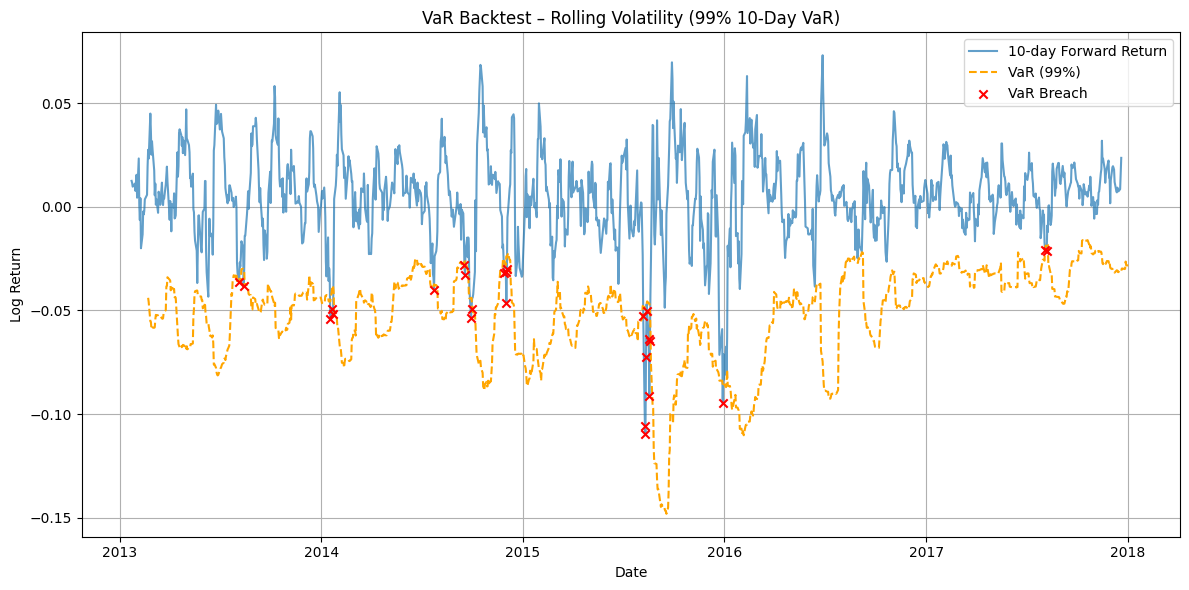

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the data
df = pd.read_csv("/Users/dave/PycharmProjects/PythonProject/PythonProject1/DLMFund/portfolio_risk/data/CQF E1 2025 - Data_SP500.csv", parse_dates=["Date"], dayfirst=True)
df = df.sort_values("Date").reset_index(drop=True)

# Compute daily log returns
df["log_return"] = np.log(df["SP500"] / df["SP500"].shift(1))

# Parameters
z = norm.ppf(0.01)  # 99% confidence VaR
window = 21         # 21-day rolling window

# Rolling daily volatility
df["sigma_daily"] = df["log_return"].rolling(window=window).std()

# 10-day volatility projection
df["sigma_10d"] = df["sigma_daily"] * np.sqrt(10)

# VaR computation
df["VaR_10d"] = z * df["sigma_10d"]

# Forward 10-day log returns
df["r_10d_fwd"] = np.log(df["SP500"].shift(-10) / df["SP500"])

# Identify VaR breaches
df["breach"] = (df["r_10d_fwd"] < df["VaR_10d"]).astype(int)

# Count and stats
breach_count = df["breach"].sum()
total = df["breach"].count()
breach_pct = 100 * breach_count / total
consec_breach_count = ((df["breach"].shift(1) == 1) & (df["breach"] == 1)).sum()

print(f"VaR Breaches: {breach_count} / {total} = {breach_pct:.2f}%")
print(f"Consecutive Breaches: {consec_breach_count}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["r_10d_fwd"], label="10-day Forward Return", alpha=0.7)
plt.plot(df["Date"], df["VaR_10d"], label="VaR (99%)", linestyle="--", color="orange")
plt.scatter(df.loc[df["breach"] == 1, "Date"], df.loc[df["breach"] == 1, "r_10d_fwd"],
            color="red", label="VaR Breach", marker="x", zorder=5)
plt.title("VaR Backtest – Rolling Volatility (99% 10-Day VaR)")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Question 7: VaR Backtesting Using EWMA Volatility

We re-implement the 99% / 10-day VaR backtest using **EWMA volatility** instead of rolling standard deviation.

#### EWMA Model

The exponentially weighted moving average (EWMA) variance is given by:

$$
\sigma_{t+1|t}^2 = \lambda \sigma_t^2 + (1 - \lambda) r_t^2
$$

Where:
- $\lambda$ is the decay factor (set to 0.72)
- $\sigma_t^2$ is the variance estimate at time $t$
- $r_t$ is the daily log return

We initialize the recursion with the variance of the first 21 returns.

#### VaR Computation

Same as before:

$$
\text{VaR}_{10D,t} = z \cdot \sigma_t \cdot \sqrt{10}
$$

#### Deliverables

- (a) Count and percentage of VaR breaches
- (b) Count and percentage of consecutive breaches
- (c) Plot showing 10-day returns, EWMA VaR, and breaches


EWMA VaR Breaches: 38 / 1250 = 3.04%
Consecutive EWMA Breaches: 21


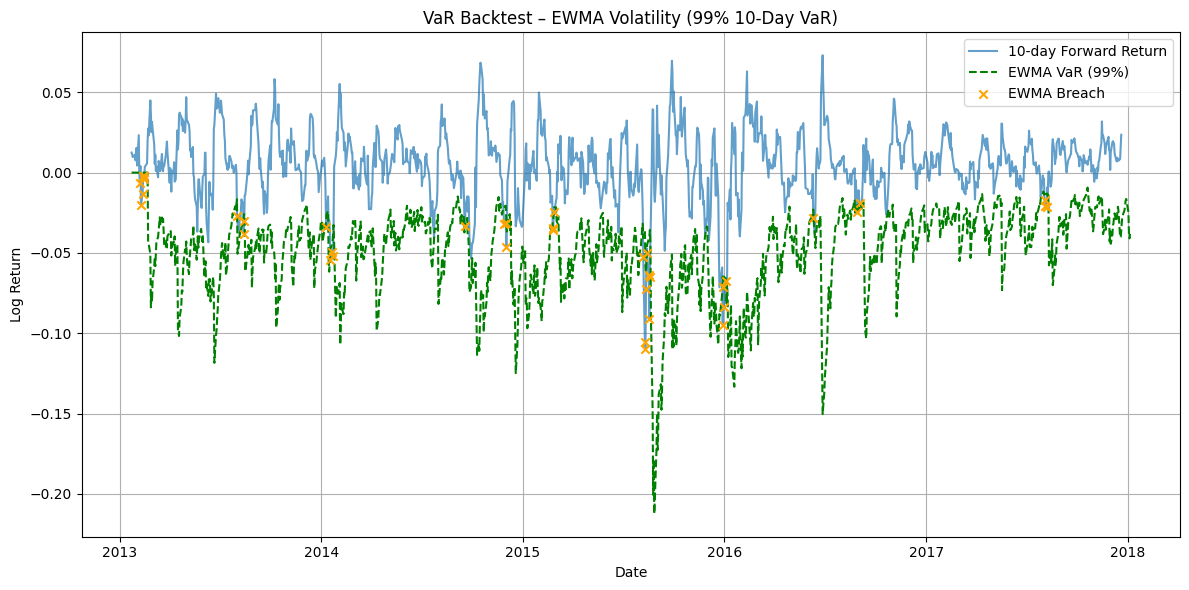

In [23]:
# EWMA parameters
lambda_ = 0.72
returns = df["log_return"].copy()

# Initialize variance with sample from first 21 returns
ewma_var = np.zeros_like(returns)
ewma_var[window] = returns.iloc[:window].var()

# Recursively compute EWMA variance
for t in range(window + 1, len(returns)):
    ewma_var[t] = lambda_ * ewma_var[t - 1] + (1 - lambda_) * returns.iloc[t - 1]**2

# Compute EWMA standard deviation
df["sigma_ewma"] = np.sqrt(ewma_var)

# Compute 10-day EWMA VaR
df["VaR_10d_ewma"] = z * df["sigma_ewma"] * np.sqrt(10)

# Identify breaches
df["breach_ewma"] = (df["r_10d_fwd"] < df["VaR_10d_ewma"]).astype(int)

# Stats
breach_count_ewma = df["breach_ewma"].sum()
total_ewma = df["breach_ewma"].count()
breach_pct_ewma = 100 * breach_count_ewma / total_ewma
consec_breach_ewma = ((df["breach_ewma"].shift(1) == 1) & (df["breach_ewma"] == 1)).sum()

print(f"EWMA VaR Breaches: {breach_count_ewma} / {total_ewma} = {breach_pct_ewma:.2f}%")
print(f"Consecutive EWMA Breaches: {consec_breach_ewma}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["r_10d_fwd"], label="10-day Forward Return", alpha=0.7)
plt.plot(df["Date"], df["VaR_10d_ewma"], label="EWMA VaR (99%)", linestyle="--", color="green")
plt.scatter(df.loc[df["breach_ewma"] == 1, "Date"], df.loc[df["breach_ewma"] == 1, "r_10d_fwd"],
            color="orange", label="EWMA Breach", marker="x", zorder=5)
plt.title("VaR Backtest – EWMA Volatility (99% 10-Day VaR)")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
